In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [6]:
class Model(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [7]:
batch_size = 64
input_size = 784
hidden_size = 200
output_size = 10
learning_rate = 0.001
epochs = 10
tr_ds = 'Training Dataset'
te_ds = 'Test Dataset'

In [8]:
train_dataset = datasets.FashionMNIST(root='Data/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.FashionMNIST(root='Data/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

12.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting Data/FashionMNIST\raw\train-images-idx3-ubyte.gz to Data/FashionMNIST\raw



100.6%


Extracting Data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to Data/FashionMNIST\raw



100.0%


Extracting Data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to Data/FashionMNIST\raw



119.3%

Extracting Data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to Data/FashionMNIST\raw



In [9]:
model = Model(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
def check_accuracy(loader, model):
    correct = 0
    samples = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.reshape(x.shape[0], -1)

            y_pred = model(x)
            _, y_pred = y_pred.max(1)
            correct += (y_pred == y).sum()
            samples += y_pred.size(0)

        print(
            f'Accuracy on {tr_ds if loader.dataset.train else te_ds} is {correct} / {samples} = {(correct / samples) * 100:.2f}')
    model.train()

Accuracy on Test Dataset is 1268 / 10000 = 12.68
Epoch: 0 and Loss: 0.531317
Accuracy on Test Dataset is 8371 / 10000 = 83.71
Epoch: 1 and Loss: 0.385792
Accuracy on Test Dataset is 8622 / 10000 = 86.22
Epoch: 2 and Loss: 0.345697
Accuracy on Test Dataset is 8599 / 10000 = 85.99
Epoch: 3 and Loss: 0.318781
Accuracy on Test Dataset is 8695 / 10000 = 86.95
Epoch: 4 and Loss: 0.299056
Accuracy on Test Dataset is 8725 / 10000 = 87.25
Epoch: 5 and Loss: 0.284753
Accuracy on Test Dataset is 8723 / 10000 = 87.23
Epoch: 6 and Loss: 0.272786
Accuracy on Test Dataset is 8737 / 10000 = 87.37
Epoch: 7 and Loss: 0.260069
Accuracy on Test Dataset is 8734 / 10000 = 87.34
Epoch: 8 and Loss: 0.250491
Accuracy on Test Dataset is 8787 / 10000 = 87.87
Epoch: 9 and Loss: 0.242740


Text(0, 0.5, 'Losses')

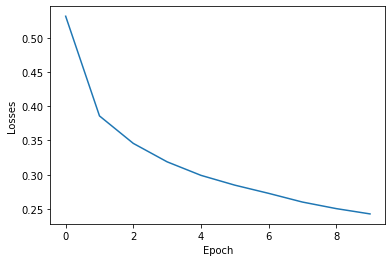

In [11]:
losses = []

for epoch in range(epochs):
    batch_count = 0
    total_loss = 0
    check_accuracy(test_loader, model)
    for batch_index, (x,y) in enumerate(train_loader):
        x = x.reshape(x.shape[0], -1)

        y_pred = model(x)
        loss = criterion(y_pred, y)

        total_loss += loss.item()
        batch_count += 1

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / batch_count
    print(f'Epoch: {epoch} and Loss: {avg_loss:.6f}')
    losses.append(round(avg_loss,6))

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Losses')

In [12]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Accuracy on Training Dataset is 55063 / 60000 = 91.77
Accuracy on Test Dataset is 8835 / 10000 = 88.35
